## **<font style="color:rgb(134,19,348)">Face Detection using Haar-Cascade</font>**

- Identifying given object in an image is known as object detection. We will use Haar Cascade pre-trained XML files. It's the simplest way to to perform object detection.

- Haar Cascade is a feature-based object detection algorithm to detect objects from images. A cascade function is trained on lots of positive and negative images for detection.

- Haar Cascade can’t be used for face recognition since it only identifies the matching shape and size.

- Haar cascade uses the cascade function and cascading window. It tries to calculate features for every window and classify positive and negative. If the window could be a part of an object, then positive, else, negative.(It's more like binary classifier, as it assigns positive to those cascade windows that can be a part of our object)

- The OpenCV library manages a repository on GitHub for all popular haar cascades pre-trained files that can be used for various object detection tasks, for example:

    - Human face detection
    - Eye detection
    - Vehicle detection
    - Nose / Mouth detection
    - body detection
    - license plate detection

https://github.com/opencv/opencv/tree/master/data/haarcascades

### **<font style="color:rgb(120,120,50)">Haar Features</font>**


<!-- https://youtu.be/q2oDd5kX3Wo?si=OgEibX14-pesbzUv -->


The Viola-Jones algorithm uses a set of features similar to Haar wavelets, which are a set of square-shaped functions. More specifically, the algorithm uses three types of Haar-like features represented in the following figure:

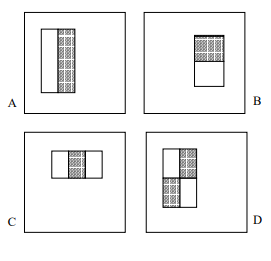

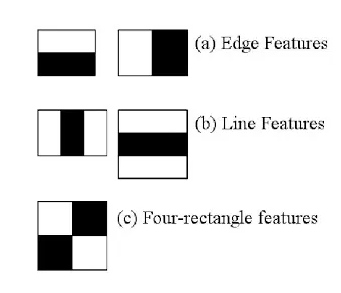

Edge Features: Detect edges of an object. Smallest scale- 1x2 or 2x1.
Line Features: Detect lines and highlights within an object. Smallest scale- 1x3 or 3x1.
Four-Rectangle Features: Detect diagonal edges and lines. Smallest scale- 2x2

Each feature specifies a set of rectangles in the image window. A rectangle can be marked as white or black. The feature value is computed as the difference between the sum of the pixel values in the white areas and the sum of pixel values in the black areas.

The feature value will be around zero for “flat regions”, i.e., where all the pixels have the same value. A large feature value will be obtained in the regions where the pixels in the black and white rectangles are very different.

- Think of Haar features as shapes that can catch the shadows and bright spots on a face. For example, the area around your eyes might be darker compared to your cheeks. Haar features can notice this by comparing the dark and light areas.

- These features use patterns of blocks, some white and some gray, to check different parts of a picture. Each pattern is like a special magnifying glass that looks for certain shadows or lights. For instance:

    - A pattern might look for the shadow under your nose by comparing the bright area of your cheeks to the darker area just below your nose.
    - Another pattern might notice the area around your eyes is darker than the area on your forehead.
- The entire reason of using these features to comapare the "white-ness" and "black-ness" of neighboring pixels.
- It uses a 24x24 window as the base window size to start evaluating these features in any given image.
- If we consider all possible parameters of the haar features like position, scale and type we end up calculating about 160,000+ features in this window (24x24).

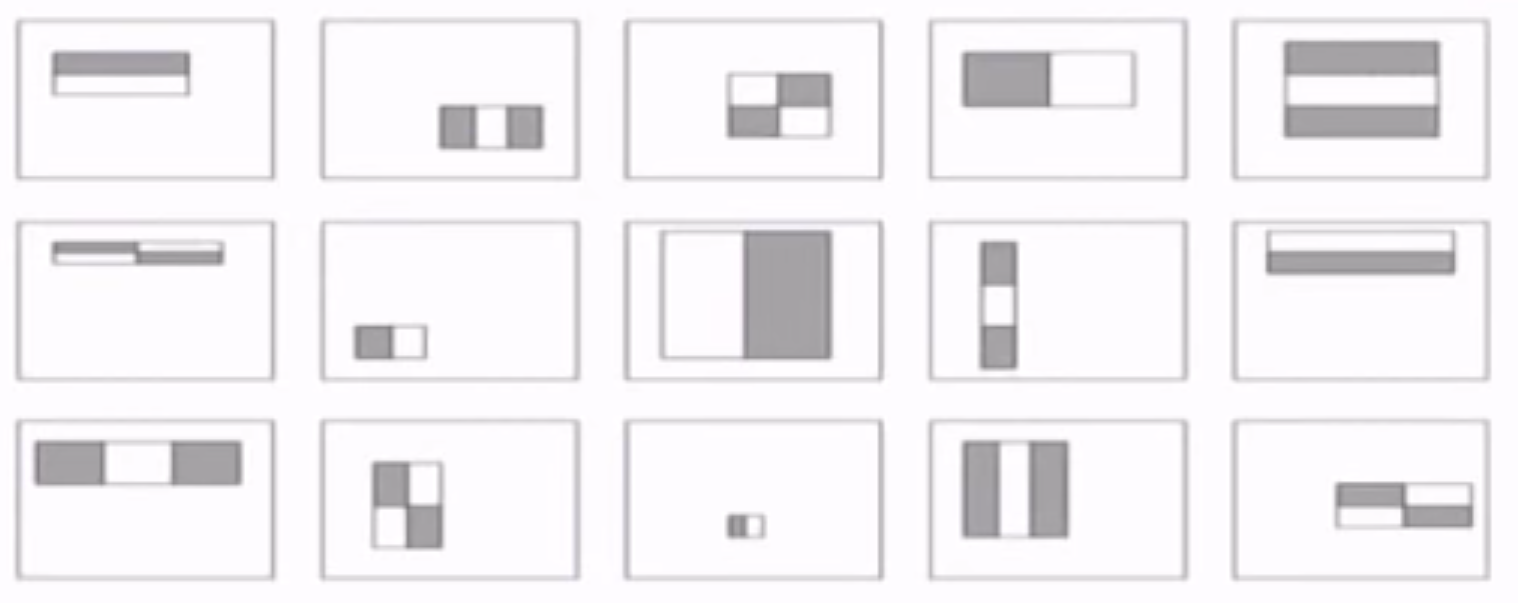


Suppose this is the gray scale representation of an image

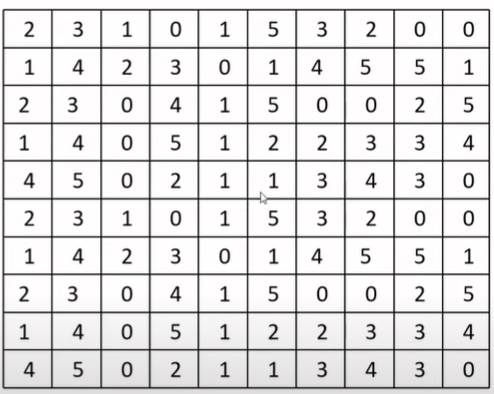

We need to calculate the deltas like this, sliding through all part of the image

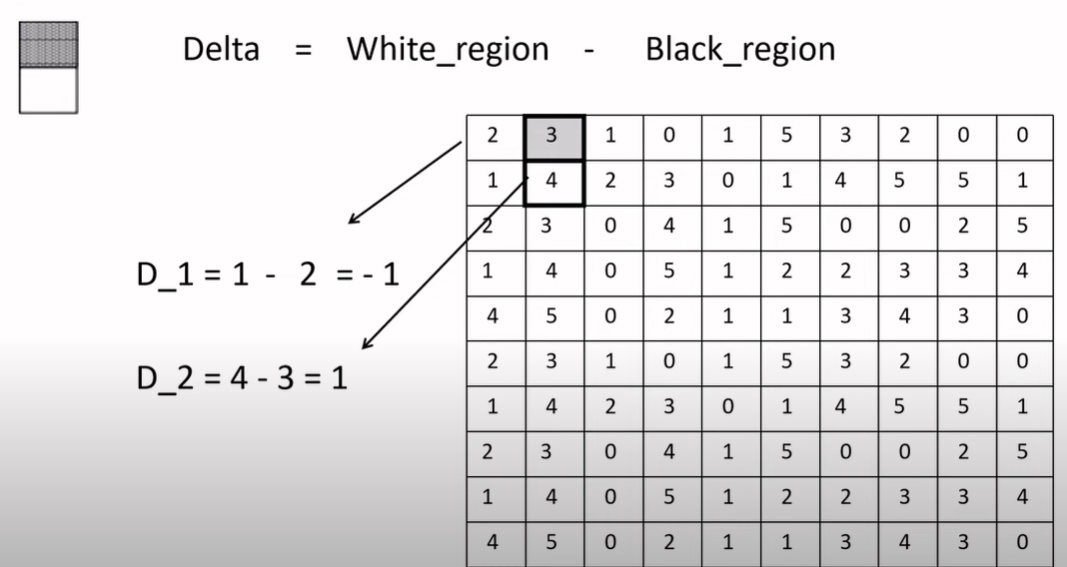

Every Haar feature is suitable at particular location. Our aim is to find highest delta for particular Haar feature.

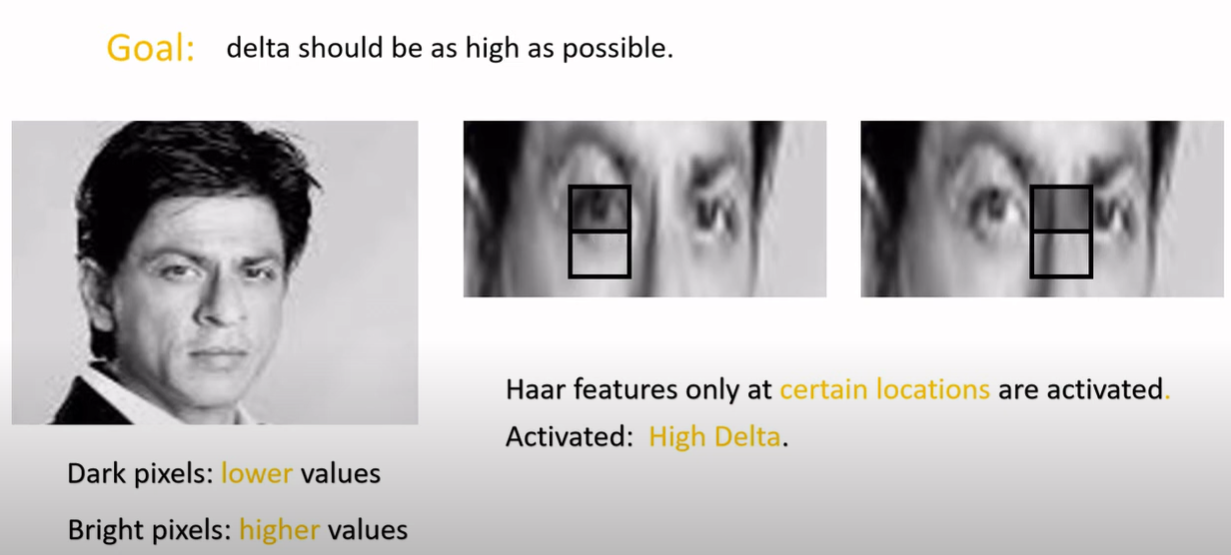

<!-- 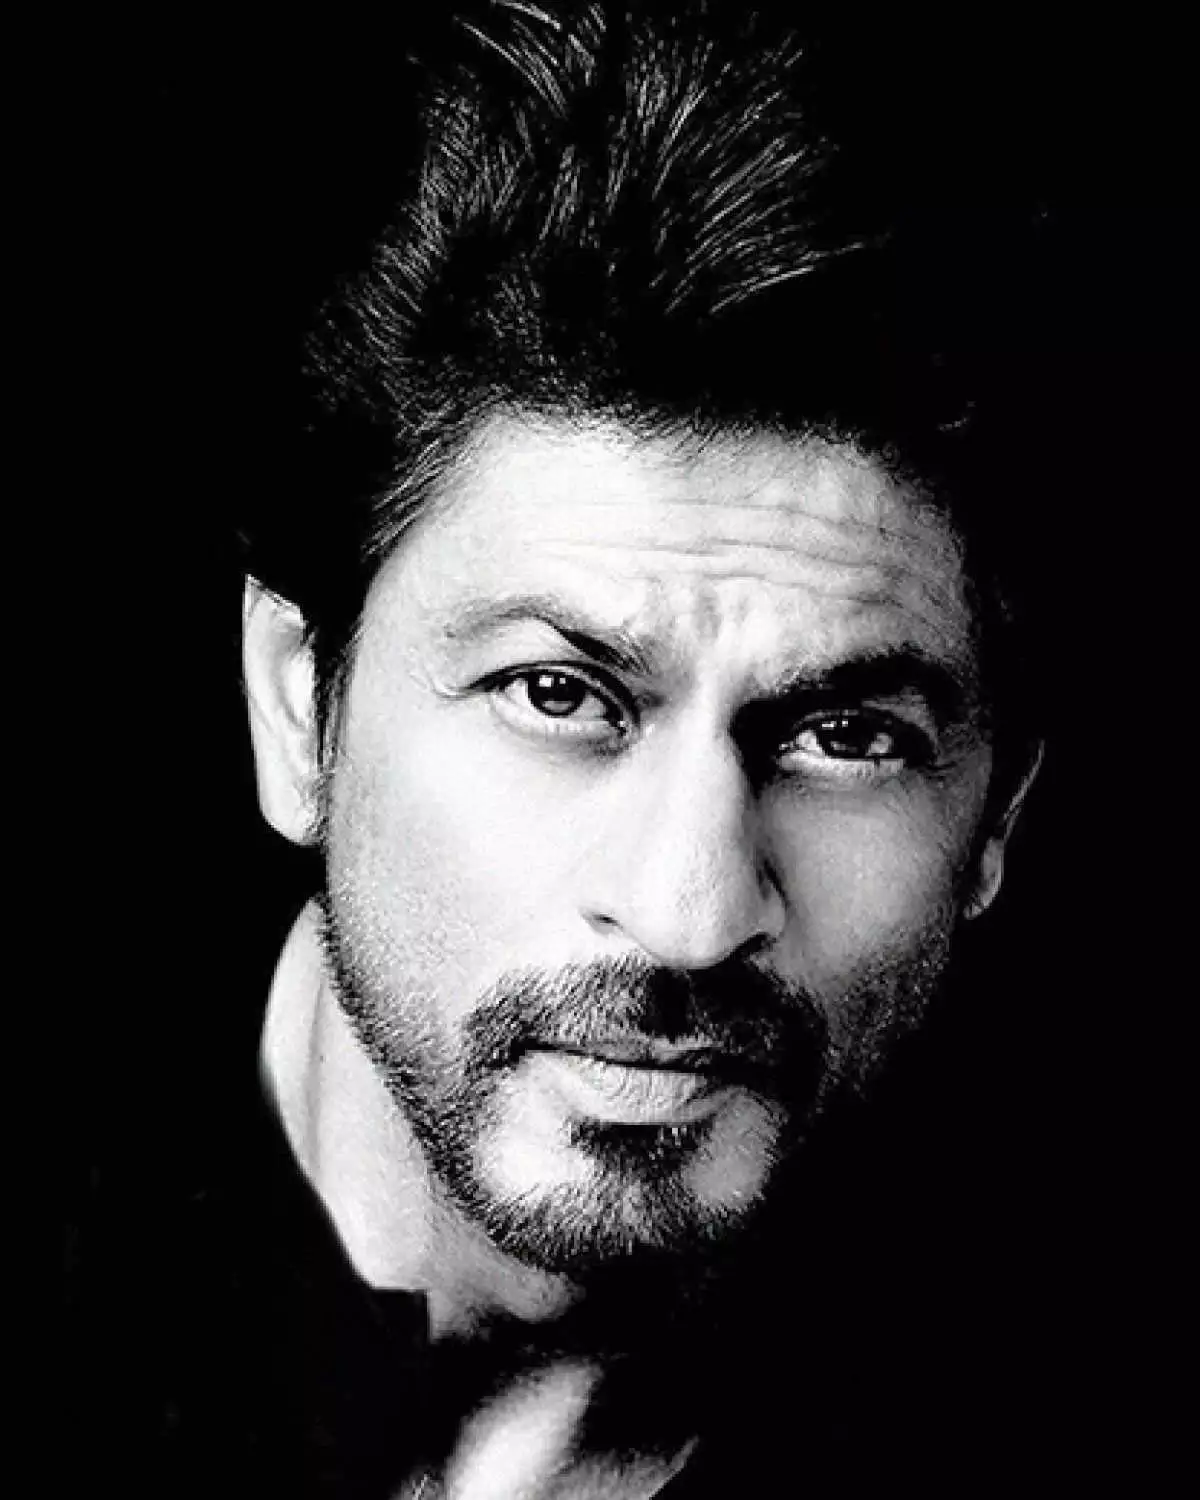 -->

### **<font style="color:rgb(120,120,50)">Integral Image</font>**


The integral image is a data structure for efficiently computing the sum of pixel values in a rectangular image window. Hence, the Haar-like features can be computed very quickly using the integral image representation.
Each point in the integral image is a sum of the pixels above and left of the corresponding pixel in the source image.


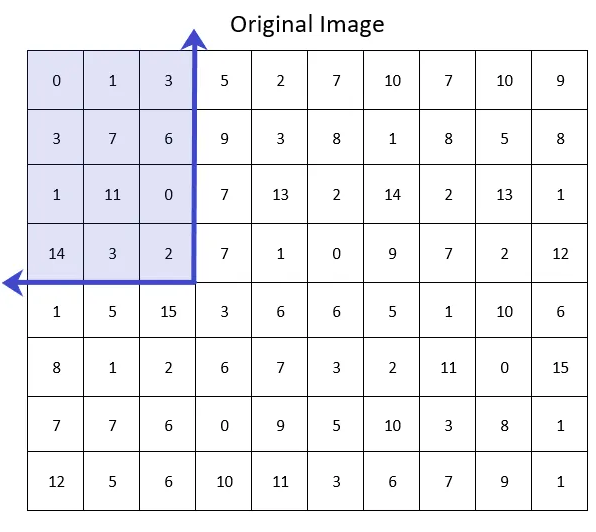

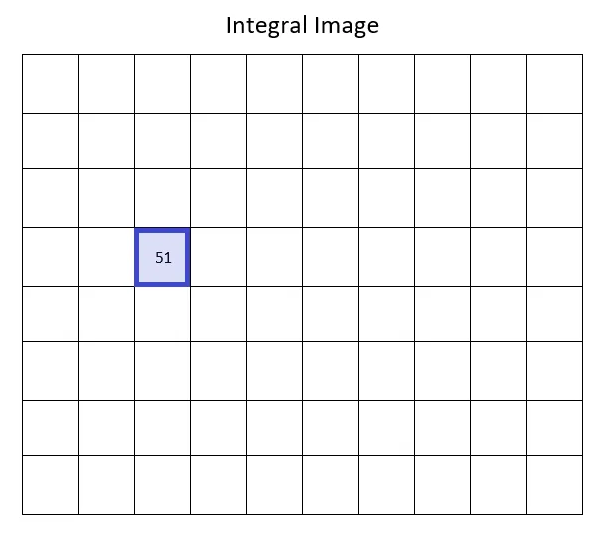


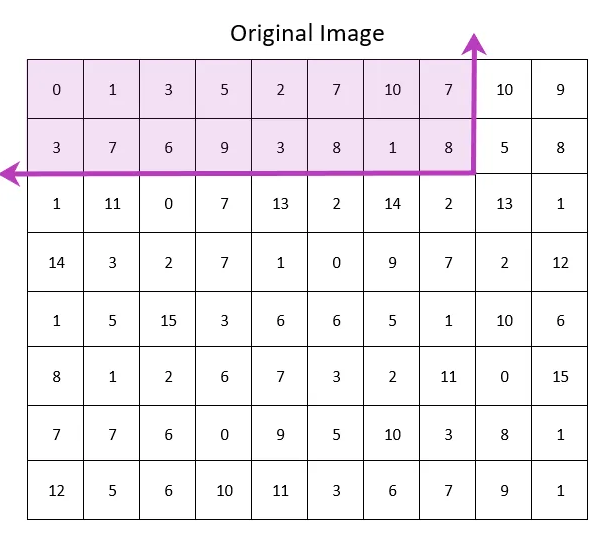

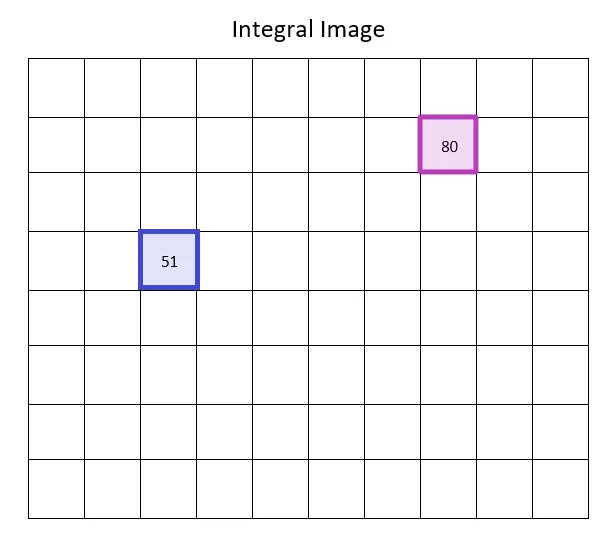

A cell in the Integral image corresponds to a specific area in the original image. The value of that cell is the sum of all the values in that corresponding area in the original image. Now that we have a little bit of intuition for how an Integral mage is made and organized, let’s fill out the rest of it.

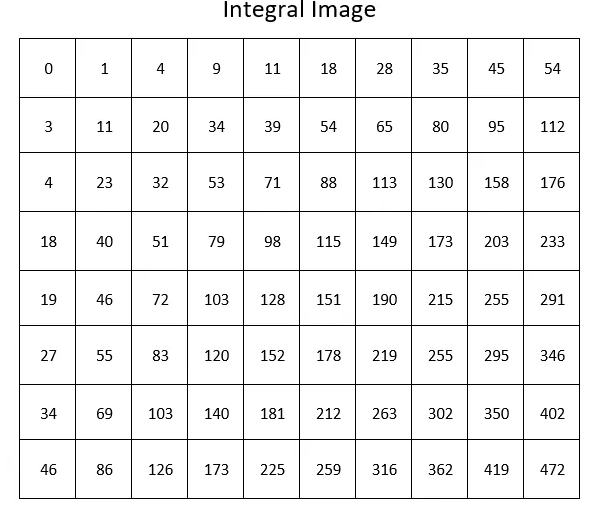

Now, go back to the original image. We’re going to select a portion of the image that we want to find the sum of and we’ll outline it in red.

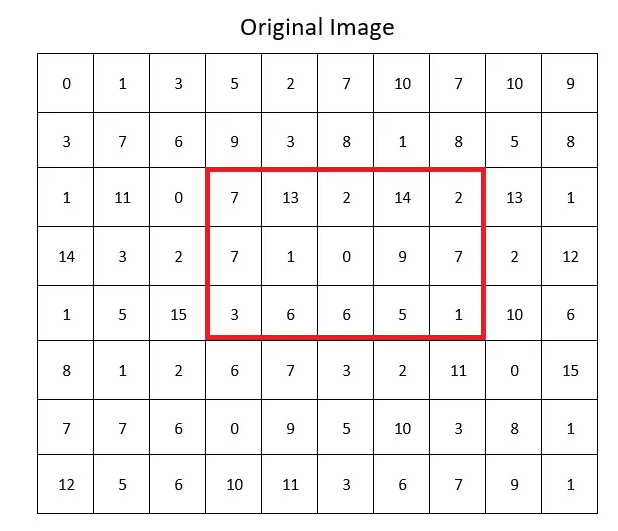

We can get the sum using below integral image,

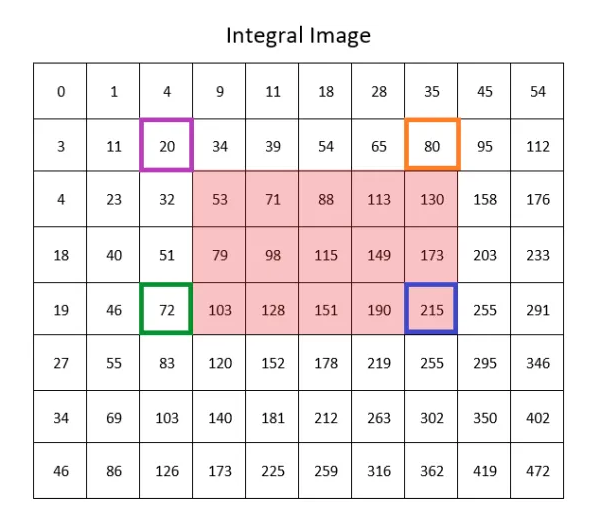

sum = (215+20) - (72+80) = 83

https://levelup.gitconnected.com/the-integral-image-4df3df5dce35

### **<font style="color:rgb(120,120,50)">Adaboost Algorithm</font>**


Boosting refers to any Ensemble method that can combine several weak learners into a strong learner. The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor. AdaBoost also known as Adaptive Boosting is one of the most popular Boosting techniques used.

One way for a new predictor to correct its predecessor is to pay a bit more attention to the training instances that the predecessor under-fitted. This results in new predictors focusing more and more on the hard cases. This is known as Adaptive Boosting. For example, to build an Adaptive Boosting classifier, a first base classifier (such a Decision Tree or SVM classifier) is trained and used to make predictions on the training set. The relative weights of the misclassified predictions are altered and increased in order to lay more emphasis on these predictions while making the next predictor. A second classifier is trained using the updated weights and again it makes predictions on the training set, weights are updated and so on. Once all the predictions are trained, the ensemble method makes predictions very much like boosting except the predictors have different weights depending on their overall accuracy on the weighted training set. The drawback of this type of algorithm is that it cannot be parallelized thereby increasing time required. Thus after successfully running AdaBoost on all the features we are left with the most relevant features required for detection. Therefore, this reduces computational time as we don’t have to go through all the features and is much more efficient.

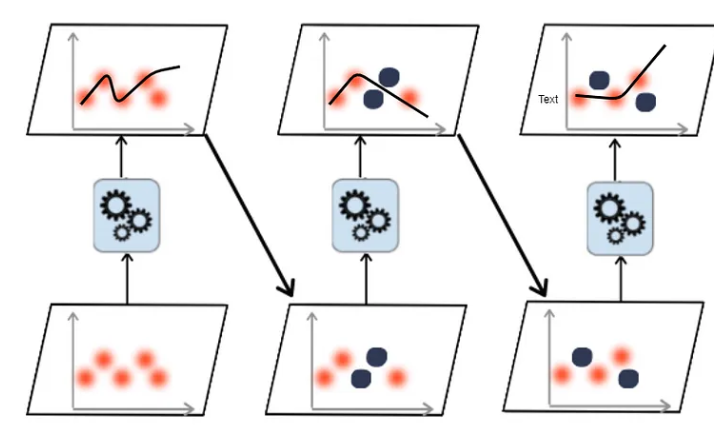




### **<font style="color:rgb(120,120,50)">Cascade Filters</font>**

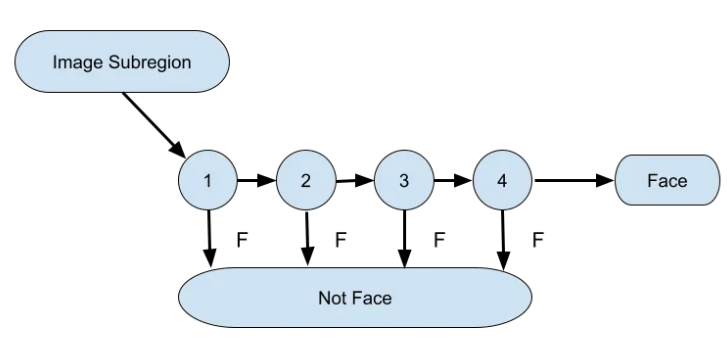

In simple terms, each feature acts as a binary classifier in a cascade filter. If an extracted feature from the image is passed through the classifier and it predicts that the image consists of that feature then it is passed on to the next classifier for next feature existence check otherwise it is discarded and next image is checked. This thereby decreases computation time as we have to check only some features in windows where the object is not present rather than checking all features.

### **<font style="color:rgb(120,120,50)">Steps Breaking Down</font>**

**`face_cascade = cv2.CascadeClassifier(<XML_cascade_path>)`**

This initializes a cascade classifier object using OpenCV's *`CascadeClassifier`* class. A cascade classifier is a machine learning-based model trained to detect objects in images. In this case, this classifier trained specifically to detect human faces. The *`XML_cascade_path`* variable should contain the path to the XML file that defines the cascade classifier model.


**`faces = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)`**

The primary purpose of detectMultiScale is to detect objects of interest (e.g., faces) at multiple scales within an image. Objects can appear at different sizes due to variations in distance, perspective, or image resolution. By processing the image at multiple scales, the algorithm increases the likelihood of detecting objects of varying sizes.

Internally, detectMultiScale employs a sliding window approach. It moves a rectangular window (often referred to as a "window" or "detector") across the image at different positions and scales. At each position and scale, the classifier evaluates whether the contents of the window resemble the target object (e.g., a face). The classifier is trained to recognize patterns and features indicative of the object being detected.

- *`scaleFactor`*: This parameter specifies how much the feature size is reduced at each feature scale. It helps in the detection of faces at different scales. A smaller scaleFactor value increases the chance of detecting faces but also increases computation time. A value of 1.1 means the algorithm is trying to detect faces at slightly different scales by resizing the input image by 10% at each step.

   

- *`minNeighbors`*: This parameter specifies how many neighbors each candidate rectangle should have to retain it. Higher values result in fewer detections but with higher quality. A lower value will detect more faces but might also include false positives. A value of 5 indicates that a candidate rectangle should have at least 5 neighbors to be considered a valid detection.


In [1]:
import cv2
import matplotlib.pyplot as plt

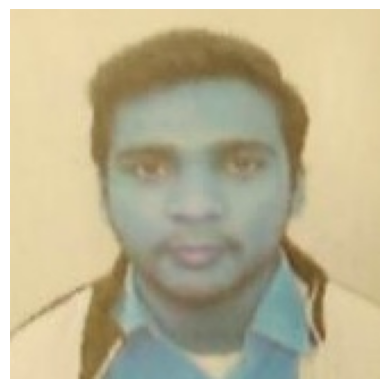

In [2]:
cascade_path = "data\\models\\haarcascade_frontalface_default.xml"
image_path = "data\\02_intermediate_data\\contour_id.jpg"
# Read the image
img = cv2.imread(image_path)

# Convert the image to grayscale (Haar cascade works better with grayscale images)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load the Haar cascade classifier
face_cascade = cv2.CascadeClassifier(cascade_path)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

# faces
# Find the face with the largest area
max_area = 0
largest_face = None
for (x, y, w, h) in faces:
    area = w * h
    if area > max_area:
        max_area = area
        largest_face = (x, y, w, h)

# Extract the largest face
if largest_face is not None:
    (x, y, w, h) = largest_face
    # extracted_face = img[y:y+h, x:x+w]
    
    # Increase dimensions by 15%
    new_w = int(w * 1.50)
    new_h = int(h * 1.50)
    
    # Calculate new (x, y) coordinates to keep the center of the face the same
    new_x = max(0, x - int((new_w - w) / 2))
    new_y = max(0, y - int((new_h - h) / 2))

    # Extract the enlarged face
    extracted_face = img[new_y:new_y+new_h, new_x:new_x+new_w]

plt.imshow(extracted_face)
plt.axis('off')
plt.show()

## **<font style="color:rgb(134,19,348)">Face Recognition</font>**

**`Dlib`**: Dlib is a C++ library with Python bindings, known for its excellent face detection and shape prediction capabilities. It also includes a pre-trained face recognition model.

**`Face_recognition`**: This Python library is built on top of dlib and provides a simple API for face recognition tasks. It offers both face detection and recognition functionalities.

In [3]:
import face_recognition

face1 = face_recognition.load_image_file("data\\01_raw_data\\extracted_face.jpg")
face1 = cv2.cvtColor(face1, cv2.COLOR_BGR2RGB)

face2 = face_recognition.load_image_file("data\\01_raw_data\\extracted_face.jpg")
face2 = cv2.cvtColor(face2, cv2.COLOR_BGR2RGB)

face3 = face_recognition.load_image_file("data\\01_raw_data\\bibek_face.jpg")
face3 = cv2.cvtColor(face3, cv2.COLOR_BGR2RGB)

#--Converting image into encodings
face_encode1 = face_recognition.face_encodings(face1)[0]
face_encode2 = face_recognition.face_encodings(face2)[0]
face_encode3 = face_recognition.face_encodings(face3)[0]


In [4]:
print(face_recognition.compare_faces([face_encode1],face_encode2)[0])
print(face_recognition.compare_faces([face_encode3],face_encode2)[0])

True
False
